*   feature selection:
         [
         'Auction_key',   
         'Claim_price',           
         'Total_land_gross_area','Total_land_real_area',
         'Total_building_area','Total_building_auction_area','Total_appraisal_price','Minimum_sales_price',
         'addr_do','addr_si','Total_floor','Current_floor']

*   result, regist, rent에서 data 추출

In [2]:
!unzip data03.zip

Archive:  data03.zip
  inflating: Auction_master_en.zip   
  inflating: Auction_master_kr.zip   


In [3]:
!unzip Auction_master_kr.zip

Archive:  Auction_master_kr.zip
  inflating: Auction_rent.csv        
   creating: __MACOSX/
  inflating: __MACOSX/._Auction_rent.csv  
  inflating: Auction_submission.csv  
  inflating: __MACOSX/._Auction_submission.csv  
  inflating: Auction_master_test.csv  
  inflating: __MACOSX/._Auction_master_test.csv  
  inflating: Auction_master_train.csv  
  inflating: __MACOSX/._Auction_master_train.csv  
  inflating: Auction_regist.csv      
  inflating: __MACOSX/._Auction_regist.csv  
  inflating: Auction_result.csv      
  inflating: __MACOSX/._Auction_result.csv  


In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import datetime
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [5]:
Auction_master_test=pd.read_csv("Auction_master_test.csv")
Auction_master_train=pd.read_csv("Auction_master_train.csv")
Auction_regist=pd.read_csv("Auction_regist.csv")
Auction_rent=pd.read_csv("Auction_rent.csv")
Auction_result=pd.read_csv("Auction_result.csv")
Auction_submission=pd.read_csv("Auction_submission.csv")


In [6]:
Auction_master_train.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

In [7]:
Auction_master_train.isna().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [33]:
feature=['Auction_key','Claim_price','Total_land_gross_area','Total_land_real_area',
         'Total_building_area','Total_building_auction_area','Total_appraisal_price','Minimum_sales_price',
         'addr_do','addr_si','Total_floor','Current_floor']
train=Auction_master_train[feature]

test=Auction_master_test[feature]
y=Auction_master_train['Hammer_price']

train

,Auction_key,Claim_price,Total_land_gross_area,Total_land_real_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,addr_si,Total_floor,Current_floor
0,2687,1766037301,12592.0,37.35,181.77,181.77,836000000,668800000,부산,해운대구,45,5
1,2577,152946867,42478.1,18.76,118.38,118.38,1073000000,858400000,부산,해운대구,70,51
2,2197,11326510,149683.1,71.00,49.94,49.94,119000000,76160000,부산,사상구,15,14
3,2642,183581724,24405.0,32.98,84.91,84.91,288400000,230720000,부산,남구,20,11
4,1958,45887671,774.0,45.18,84.96,84.96,170000000,136000000,부산,사하구,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,280000000,66419.3,40.55,84.87,84.87,401000000,401000000,서울,도봉구,21,15
1929,1295,200000000,20433.8,39.60,114.81,114.81,454000000,363200000,서울,노원구,23,23
1930,254,354805459,7460.8,19.03,133.98,133.98,1285000000,1028000000,서울,중구,32,19
1931,1486,80000000,16875.8,42.20,84.94,84.94,407000000,325600000,서울,도봉구,15,11


In [35]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

train['addr_do']=encoder.fit_transform(train['addr_do'])
train['addr_si']=encoder.fit_transform(train['addr_si'])

test['addr_do']=encoder.fit_transform(test['addr_do'])
test['addr_si']=encoder.fit_transform(test['addr_si'])

In [36]:
train

,Auction_key,Claim_price,Total_land_gross_area,Total_land_real_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,addr_si,Total_floor,Current_floor
0,2687,1766037301,12592.0,37.35,181.77,181.77,836000000,668800000,0,38,45,5
1,2577,152946867,42478.1,18.76,118.38,118.38,1073000000,858400000,0,38,70,51
2,2197,11326510,149683.1,71.00,49.94,49.94,119000000,76160000,0,20,15,14
3,2642,183581724,24405.0,32.98,84.91,84.91,288400000,230720000,0,10,20,11
4,1958,45887671,774.0,45.18,84.96,84.96,170000000,136000000,0,21,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,280000000,66419.3,40.55,84.87,84.87,401000000,401000000,1,12,21,15
1929,1295,200000000,20433.8,39.60,114.81,114.81,454000000,363200000,1,11,23,23
1930,254,354805459,7460.8,19.03,133.98,133.98,1285000000,1028000000,1,36,32,19
1931,1486,80000000,16875.8,42.20,84.94,84.94,407000000,325600000,1,12,15,11


In [37]:
result=Auction_result.drop_duplicates('Auction_key')
feature_result=['Auction_key','Appraisal_price']
result=result[feature_result]
result

,Auction_key,Appraisal_price
0,1,313000000
7,2,253000000
13,3,106000000
20,4,1600000000
24,5,355000000
...,...,...
8513,2758,240000000
8516,2759,248000000
8519,2760,275000000
8522,2761,315000000


In [38]:
#result data 
def match_result(train,result):

  train['Appraisal_price_result']=0
  #train['Minimum_sales_price_result']=0

  for i in tqdm(range(train.shape[0])):
    train_key=train.iloc[i].Auction_key

    try :
      train_result=result[result.Auction_key==train_key]
    except :
      pass
    train['Appraisal_price_result'][i]=train_result['Appraisal_price']
   # train['Minimum_sales_price_result'][i]=train_result['Minimum_sales_price']
    

  return train




In [39]:
train=match_result(train,result)
test=match_result(test,result)

In [40]:
train.columns

Index(['Auction_key', 'Claim_price', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_building_area',
       'Total_building_auction_area', 'Total_appraisal_price',
       'Minimum_sales_price', 'addr_do', 'addr_si', 'Total_floor',
       'Current_floor', 'Appraisal_price_result'],
      dtype='object')

In [41]:
regist=Auction_regist.drop_duplicates('Auction_key')
feature_regist=['Auction_key','Regist_class'] #Regist_price 거의 0이므로 제거
regist=regist[feature_regist]
regist.info()
print(regist.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2732 entries, 0 to 20696
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Auction_key   2732 non-null   int64 
 1   Regist_class  2732 non-null   object
dtypes: int64(1), object(1)
memory usage: 64.0+ KB
Auction_key     0
Regist_class    0
dtype: int64


In [42]:
encoder=LabelEncoder()
regist_class=encoder.fit_transform(regist['Regist_class'])
regist['Regist_class']=regist_class

In [43]:
regist

,Auction_key,Regist_class
0,1,5
9,2,0
10,3,5
19,4,4
22,5,5
...,...,...
20663,2758,5
20667,2759,5
20677,2760,6
20690,2761,5


In [44]:
#regist data 
def match_regist(train,result):


  train['Regist_class']=np.nan
  for i in tqdm(range(train.shape[0])):
    train_key=train.iloc[i].Auction_key
    try:
      train_regist=regist[regist.Auction_key==train_key]
    except :
      train_regist=np.nan
      pass

    if len(train_regist)>=1:
      train['Regist_class'][i]=train_regist['Regist_class']
      #print(train['Regist_class'][i])
      #print(train_regist)
    else :
      train['Regist_class'][i]=np.nan
    
  return train




In [45]:
train=match_regist(train,regist)
test=match_regist(test,regist)

In [46]:
print("train: ",train.isna().sum())
print("test: ",test.isna().sum())

train:  Auction_key                     0
Claim_price                     0
Total_land_gross_area           0
Total_land_real_area            0
Total_building_area             0
Total_building_auction_area     0
Total_appraisal_price           0
Minimum_sales_price             0
addr_do                         0
addr_si                         0
Total_floor                     0
Current_floor                   0
Appraisal_price_result          0
Regist_class                   20
dtype: int64
test:  Auction_key                     0
Claim_price                     0
Total_land_gross_area           0
Total_land_real_area            0
Total_building_area             0
Total_building_auction_area     0
Total_appraisal_price           0
Minimum_sales_price             0
addr_do                         0
addr_si                         0
Total_floor                     0
Current_floor                   0
Appraisal_price_result          0
Regist_class                   10
dtype: int64


In [47]:
train=train.fillna(-1)
test=test.fillna(-1)

In [48]:
rent=Auction_rent.drop_duplicates('Auctiuon_key')
feature_rent=['Auctiuon_key','Rent_deposit','Rent_monthly_price']
rent=rent[feature_rent]
print(rent.isna().sum())
rent.info()

Auctiuon_key          0
Rent_deposit          0
Rent_monthly_price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1555
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Auctiuon_key        1244 non-null   int64
 1   Rent_deposit        1244 non-null   int64
 2   Rent_monthly_price  1244 non-null   int64
dtypes: int64(3)
memory usage: 38.9 KB


In [49]:
rent

,Auctiuon_key,Rent_deposit,Rent_monthly_price
0,1,53000000,250000
1,2,60000000,0
3,3,0,0
5,4,0,0
8,7,50000000,0
...,...,...,...
1548,2745,130000000,0
1549,2749,100000000,0
1553,2754,0,0
1554,2756,0,0


In [50]:
def match_rent(train,rent):

  
  train['Rent_deposit']=np.nan
  train['Rent_monthly_price']=np.nan
  
  for i in tqdm(range(train.shape[0])):
    
    train_key=train.iloc[i].Auction_key

    try:
      train_rent=rent[rent.Auctiuon_key==train_key]
    except :
  
      train_rent=np.nan
      pass
    if len(train_rent)>=1:
        train['Rent_deposit'][i]=train_rent['Rent_deposit']
        train['Rent_monthly_price'][i]=train_rent['Rent_monthly_price']
        #print(train['Rent_deposit'][i])
        #print(train_rent)
    else :
      train['Rent_deposit'][i]=np.nan
      train['Rent_monthly_price'][i]=np.nan

  return train

In [51]:
train=match_rent(train,rent)
test=match_rent(test,rent)

In [67]:
test

,Auction_key,Claim_price,Total_land_gross_area,Total_land_real_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,addr_si,Total_floor,Current_floor,Appraisal_price_result,Regist_class,Rent_deposit,Rent_monthly_price
0,1778,1087000000,532.0,18.22,107.28,107.28,244565981,100174000,0,15,15,5,235000000,-1.0,0.0,0.0
1,1779,1087000000,532.0,16.65,98.08,98.08,228745632,117118000,0,15,15,6,220000000,-1.0,0.0,0.0
2,1784,1087000000,532.0,18.22,107.28,107.28,249565981,102222000,0,15,15,8,240000000,-1.0,NaN,NaN
3,1786,1087000000,532.0,18.22,107.28,107.28,249565981,102222000,0,15,15,9,240000000,-1.0,0.0,0.0
4,1790,1087000000,532.0,18.22,107.28,107.28,249565981,102222000,0,15,15,11,240000000,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1762,4249164200,3460.9,13.87,84.91,84.91,420000000,336000000,1,26,23,23,420000000,6.0,0.0,0.0
825,1767,320000000,13578.9,72.81,150.66,150.66,580000000,464000000,1,12,14,3,580000000,5.0,NaN,NaN
826,1770,160000000,57491.8,34.03,49.77,49.77,293000000,234400000,1,36,12,5,293000000,5.0,0.0,0.0
827,1772,230000000,27710.2,42.54,84.84,84.84,492000000,492000000,1,26,17,16,492000000,5.0,180000000.0,200000.0


In [54]:
#impute
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')
train_impute=imputer.fit_transform(train)
test_impute=imputer.transform(test)

# train, test 정규화

In [68]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_std=scaler.fit_transform(train_impute)
x_test_std=scaler.transform(test_impute)



In [56]:
print(x_train_std)

[[ 1.63042934  1.04345617 -0.23300776 ...  0.19296819 -0.24493985
  -0.17864846]
 [ 1.49318035 -0.16257208  0.08359373 ...  0.19296819  0.30780423
   9.4882976 ]
 [ 1.01904747 -0.26845465  1.21928096 ...  0.19296819 -0.32390329
  -0.17864846]
 ...
 [-1.40526883 -0.01165236 -0.28736566 ...  0.19296819  5.44042785
  -0.17864846]
 [ 0.13191989 -0.21711086 -0.18762688 ...  0.19296819 -0.24493985
  -0.17864846]
 [-0.55307736 -0.14234579 -0.02256477 ...  0.19296819 -0.24493985
  -0.17864846]]


# PCA

In [57]:
# 고유값, 고유벡터 구하기

scov=np.cov(x_train_std.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[5.71185937e+00 2.12462017e+00 1.67550543e+00 8.25926472e-01
 8.63803008e-01 1.06071657e+00 9.45426742e-01 9.99199060e-01
 1.02046019e+00 2.95743089e-01 2.55074733e-01 1.51755453e-01
 5.30453679e-02 1.87065245e-02 6.04104503e-03 3.98351647e-04]


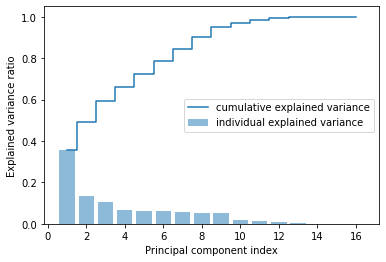

In [60]:
# Explained variance ratio
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,17), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,17), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
# PCA를 통해 차원 축소 =>하지는 않음
from sklearn.decomposition import PCA

lpca = PCA(n_components=5)
x_train_pca = lpca.fit_transform(train_std)
x_test_pca = lpca.transform(test_std)


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

tree=DecisionTreeRegressor(random_state=1)
randomforest=RandomForestRegressor(random_state=1)

params={'max_depth':[5,7,9],
        'n_estimators':[100,300,500,700]
        }

grid_randomforest=GridSearchCV(estimator=randomforest,
                               param_grid=params,
                               scoring='neg_mean_squared_error',
                               cv=10)

grid_randomforest.fit(x_train_std,y)



GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
from sklearn.model_selection import cross_val_score # 교차타당도 

scores = cross_val_score(estimator=grid_randomforest,X=x_train_std,y=y,cv=10,scoring='neg_mean_squared_error')
print("ROC AUC: %0.3f (+/- %0.3f)", (scores.mean(), scores.std()))

ROC AUC: %0.3f (+/- %0.3f) (-7.377810032263446e+16, 2.1259163875891267e+17)


In [62]:
grid_randomforest.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [69]:
predict=grid_randomforest.predict(x_test_std)
predict.shape

(829,)

In [70]:
Auction_submission['Hammer_price']=predict
Auction_submission.to_csv("result1.csv",index=False)
#70926123.07018	imputer:median